# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('../dataset/failure-heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
eda_df = df.copy()

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'student_id']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Sex: ['M' 'F']
Unique values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values in RestingECG: ['Normal' 'ST' 'LVH']
Unique values in ExerciseAngina: ['N' 'Y']
Unique values in ST_Slope: ['Up' 'Flat' 'Down']


In [8]:
numerical_columns = df.select_dtypes(include=['number','int64','float64']).columns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27468\180322307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27468\180322307.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([shorten_label(label.get_text()) for label in ax[i].get_yticklabels()])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27468\180322307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27468\1803223

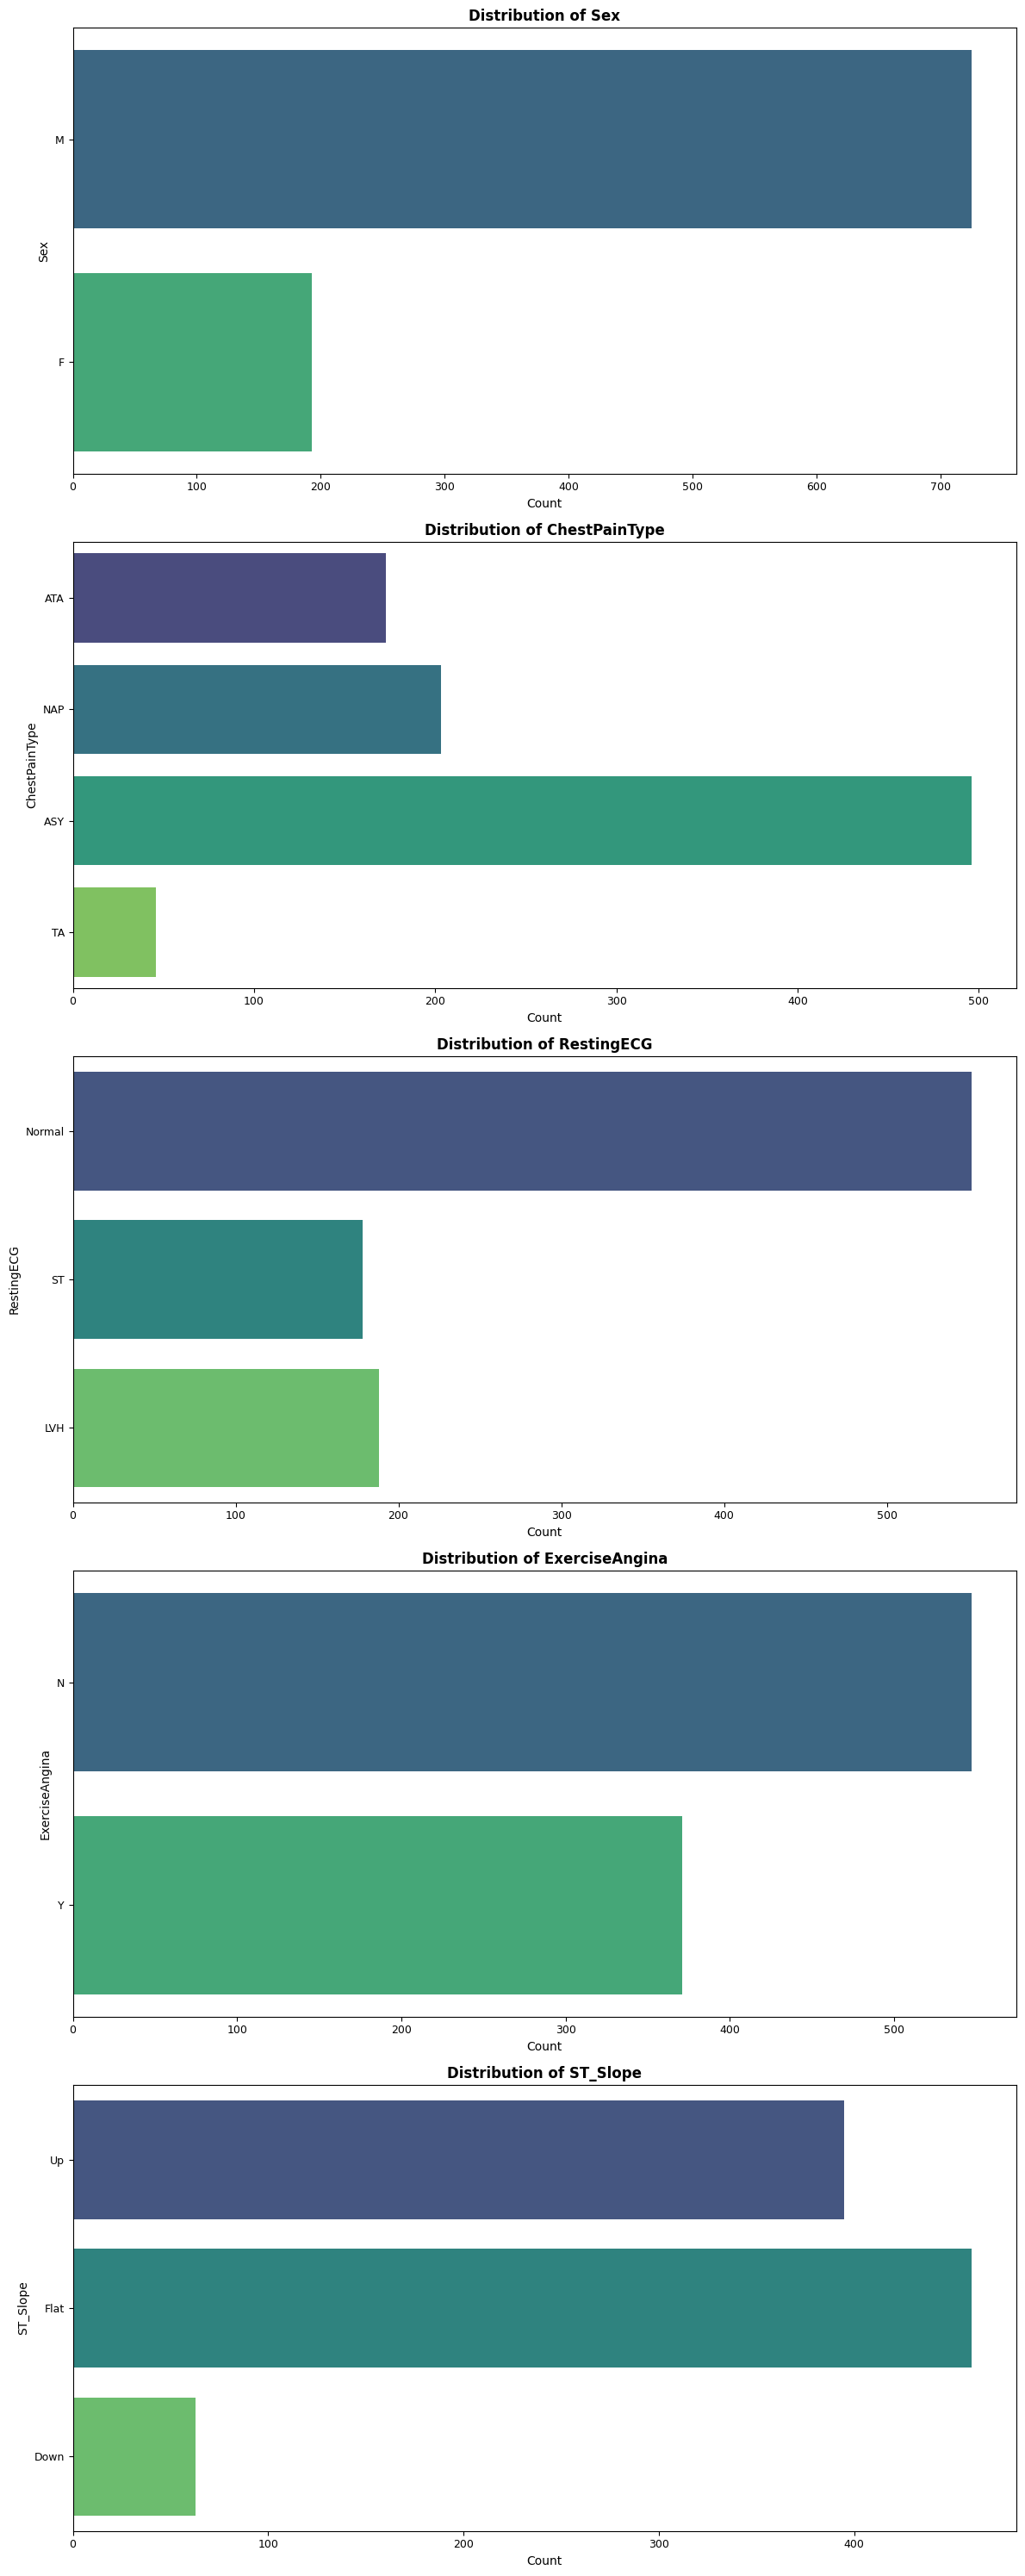

In [9]:
def shorten_label(label, max_length=20):
    return label if len(label) <= max_length else label[:max_length] + "..."

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(12, 30))
for i, feature in enumerate(categorical_columns):
    # Ambil hanya 10 label teratas berdasarkan jumlah kemunculan
    top_labels = eda_df[feature].value_counts().nlargest(10).index
    filtered_df = eda_df[eda_df[feature].isin(top_labels)]
    
    sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
    ax[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=10)
    ax[i].set_ylabel(feature, fontsize=10)
    ax[i].tick_params(axis='both', labelsize=9)
    
    # Memperpendek label pada sumbu y
    ax[i].set_yticklabels([shorten_label(label.get_text()) for label in ax[i].get_yticklabels()])

plt.tight_layout()
plt.show()

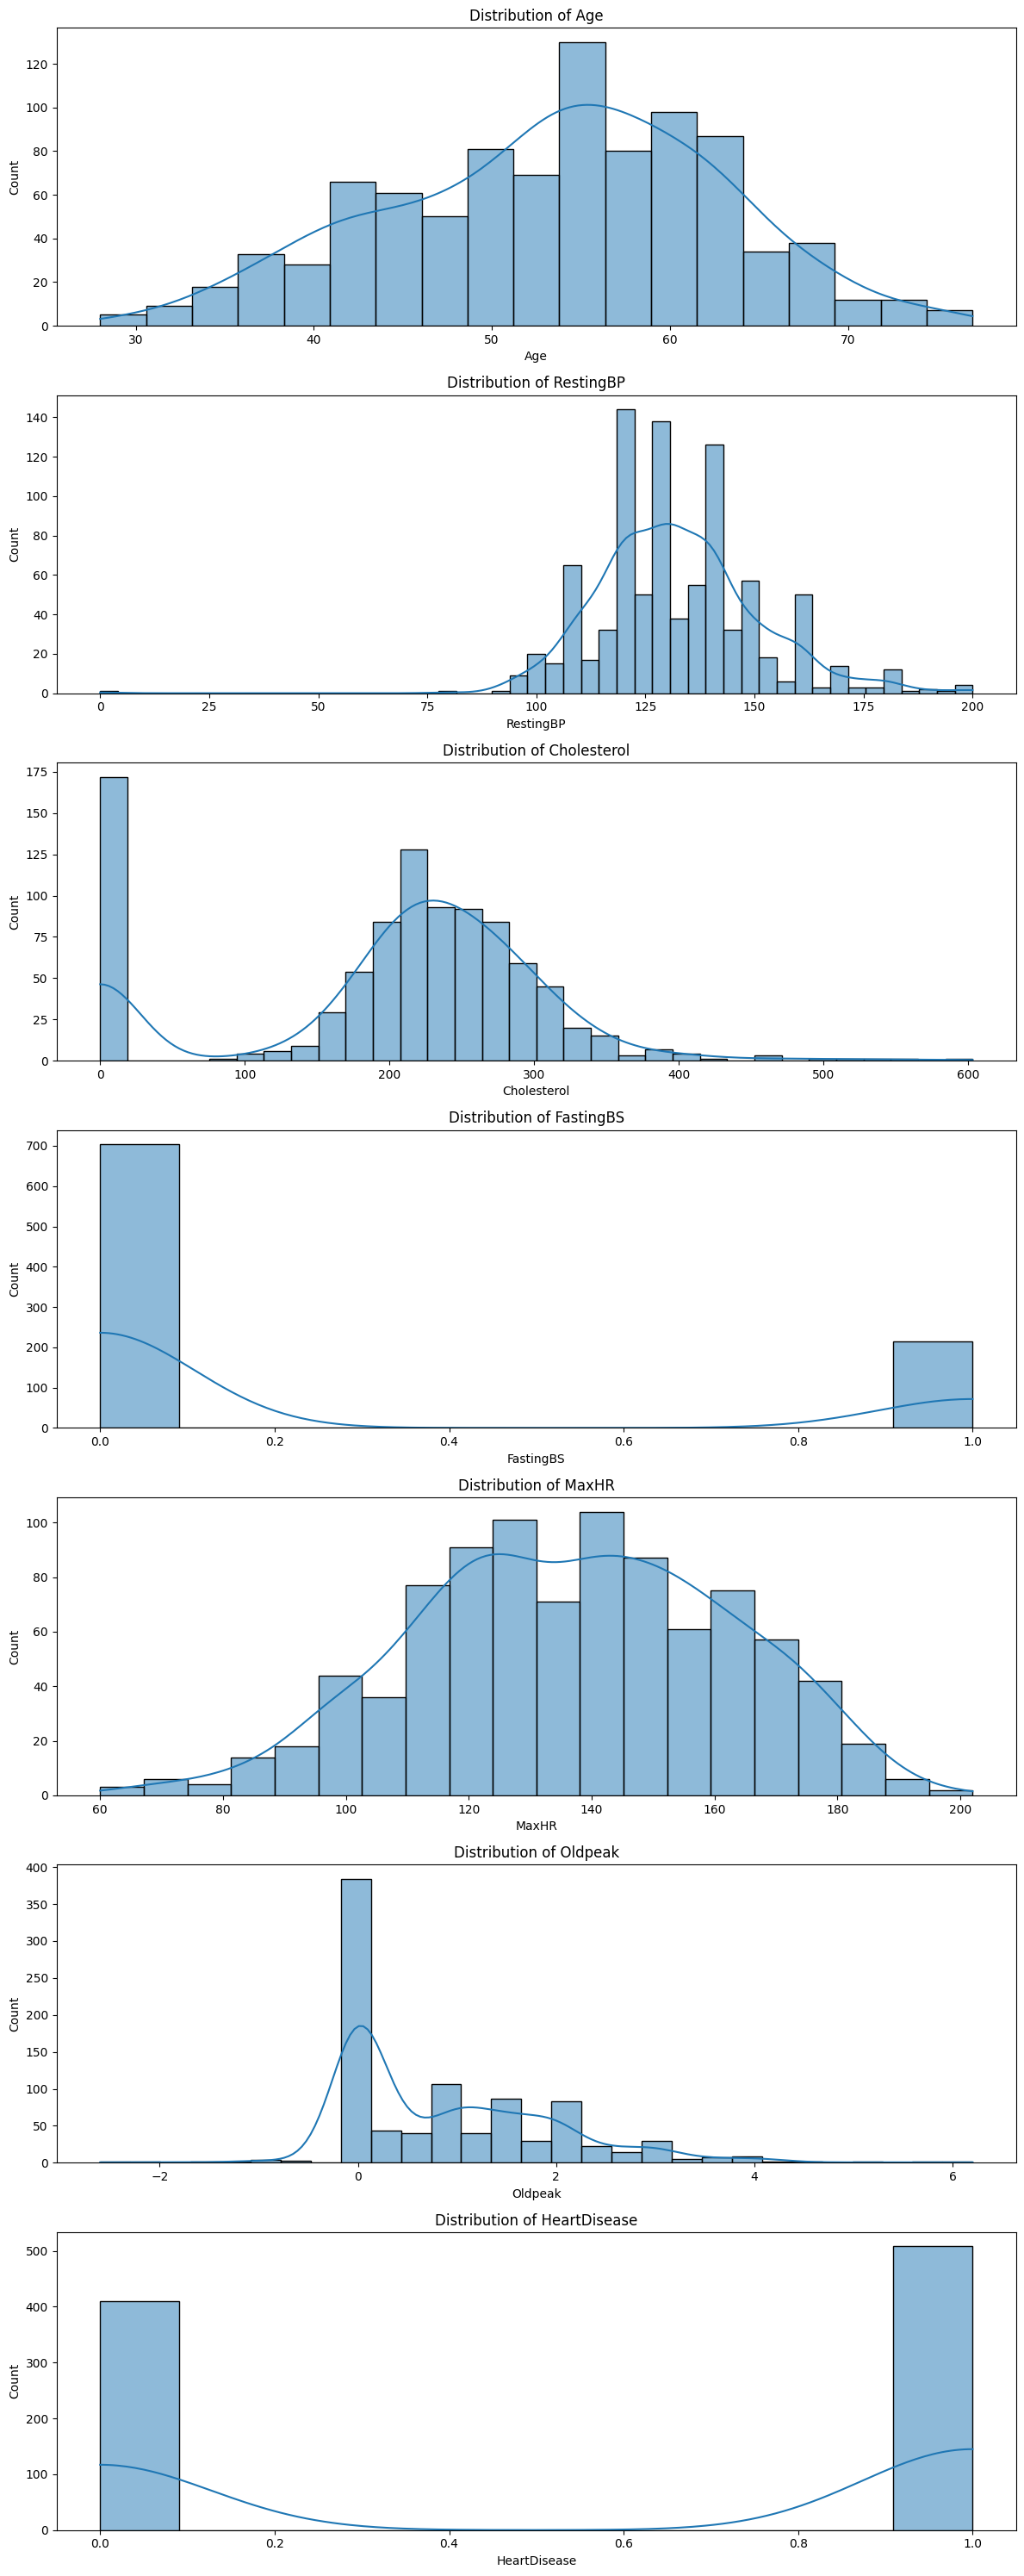

In [10]:
# Mengecek distribusi statistik pada kolom numerik untuk menentukan kebutuhan normalisasi
df[numerical_columns].describe()

# Visualisasi distribusi setiap fitur numerik
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, 30))
for i, col in enumerate(numerical_columns):
   sns.histplot(df[col], kde=True, ax=ax[i])
   ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Jika sebagian besar fitur numerik tidak berdistribusi normal (skewed), normalisasi/standarisasi disarankan.

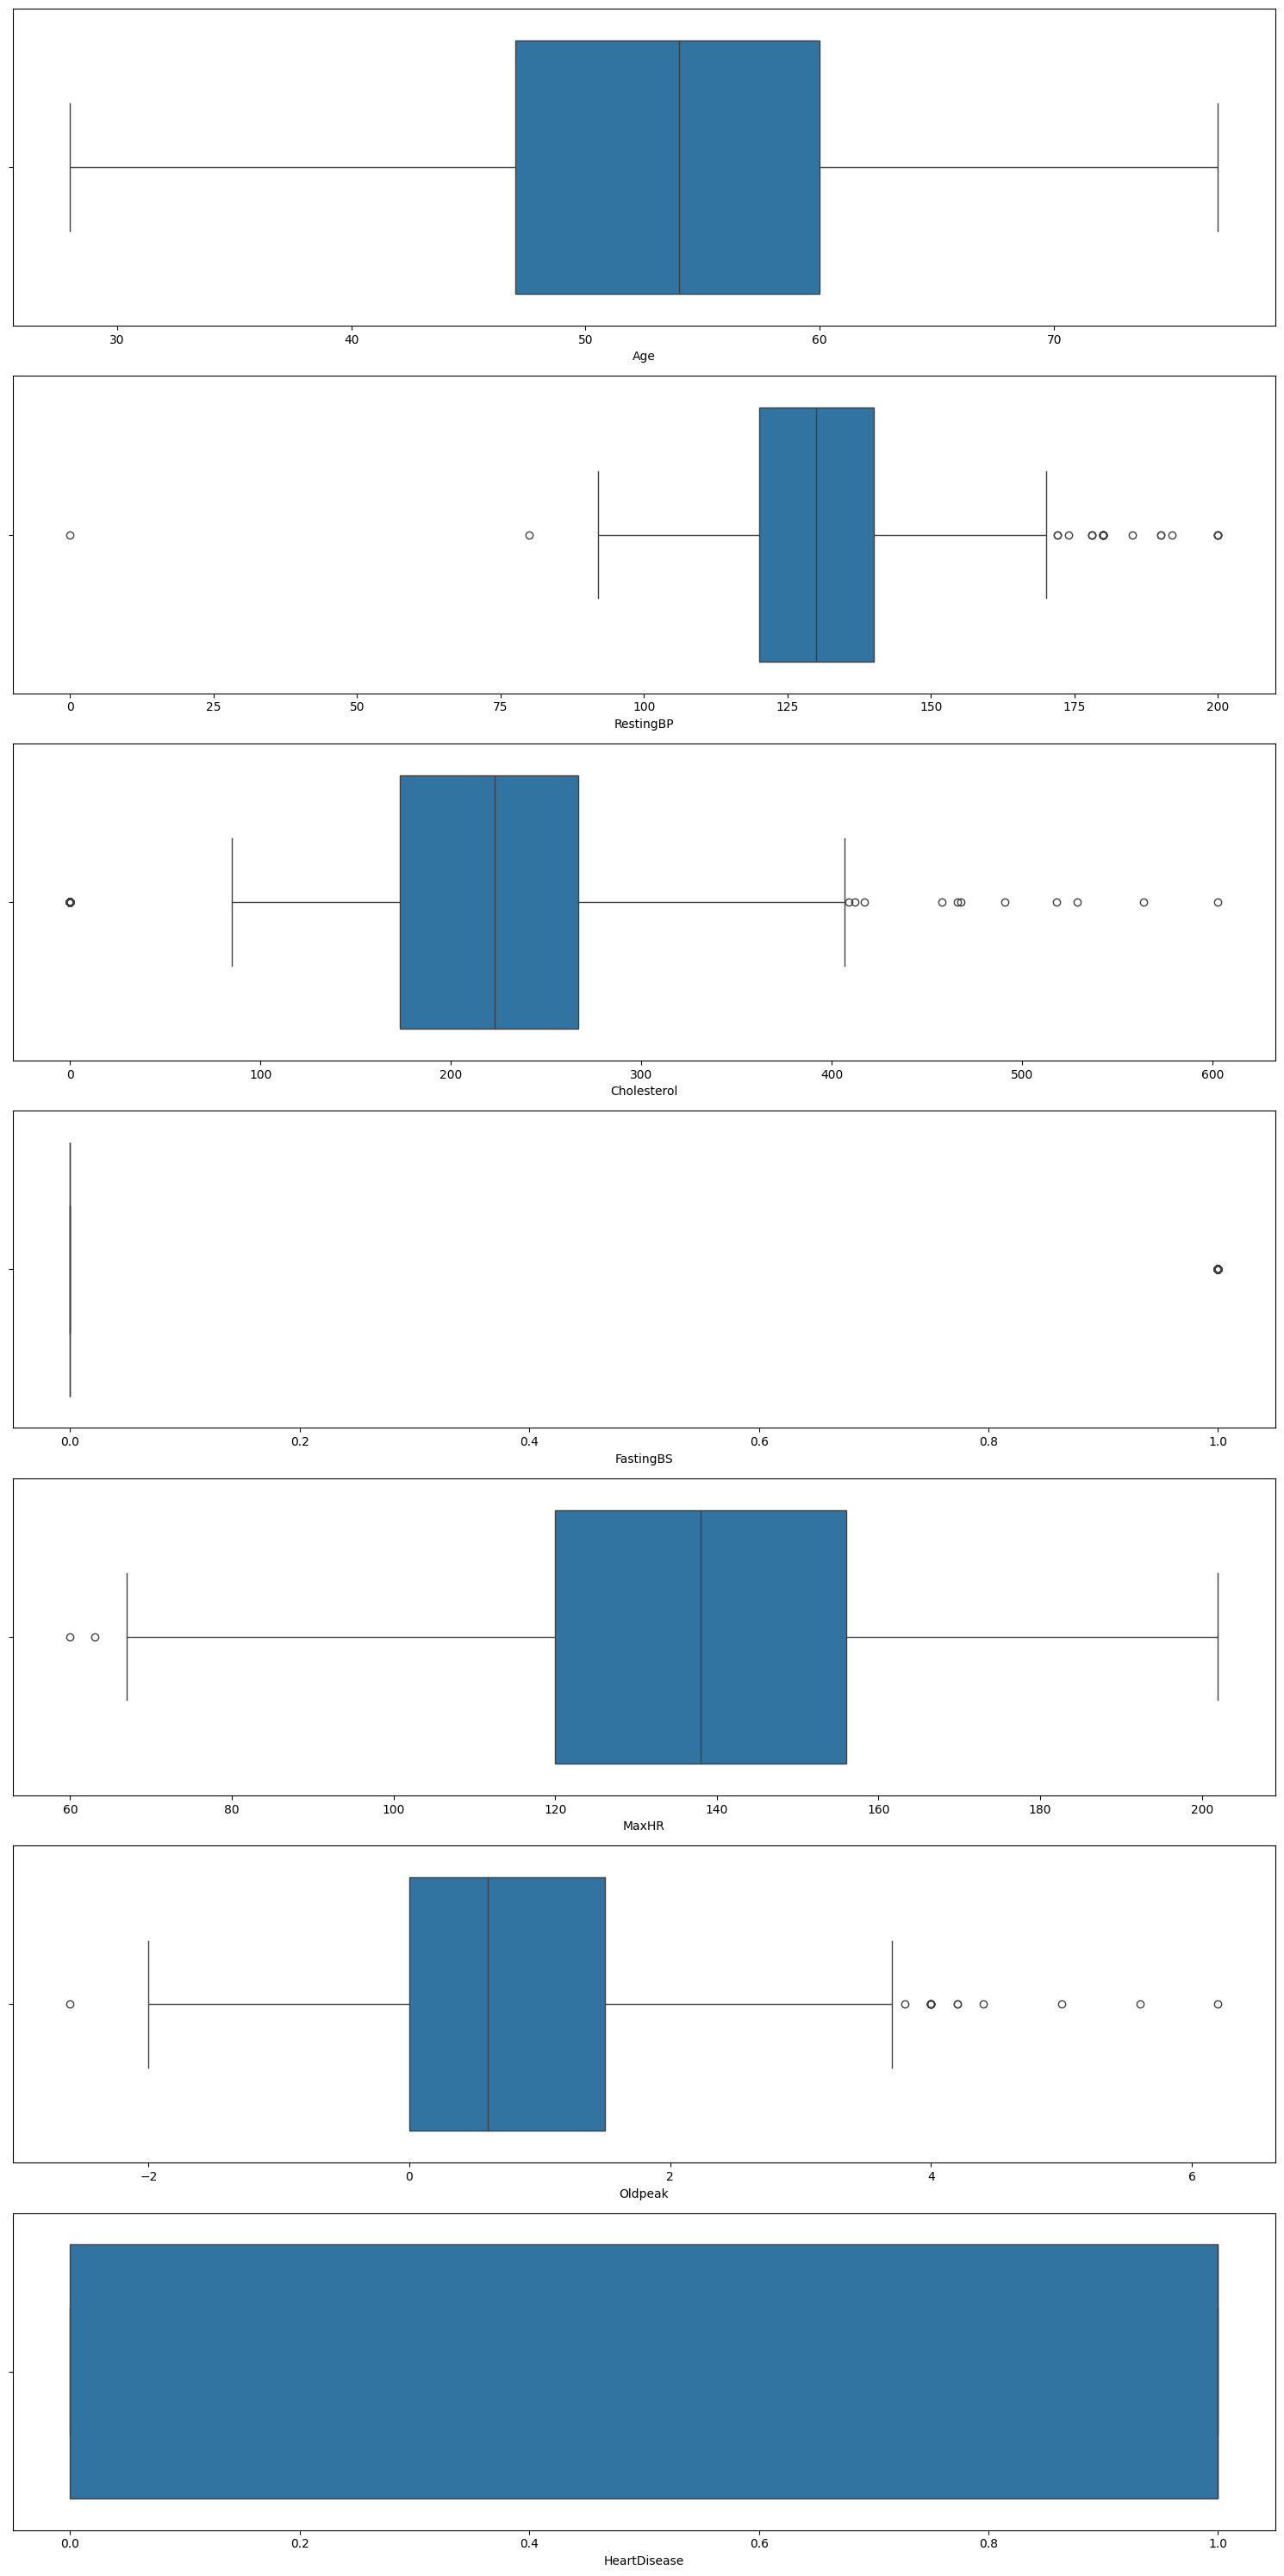

In [11]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()


numerical_dis_plot(
    features=numerical_columns,
    df=eda_df,
)

Terdapat beberapa nilai yang outlier, yang akan diperbaiki nanti di Data Preprocessing

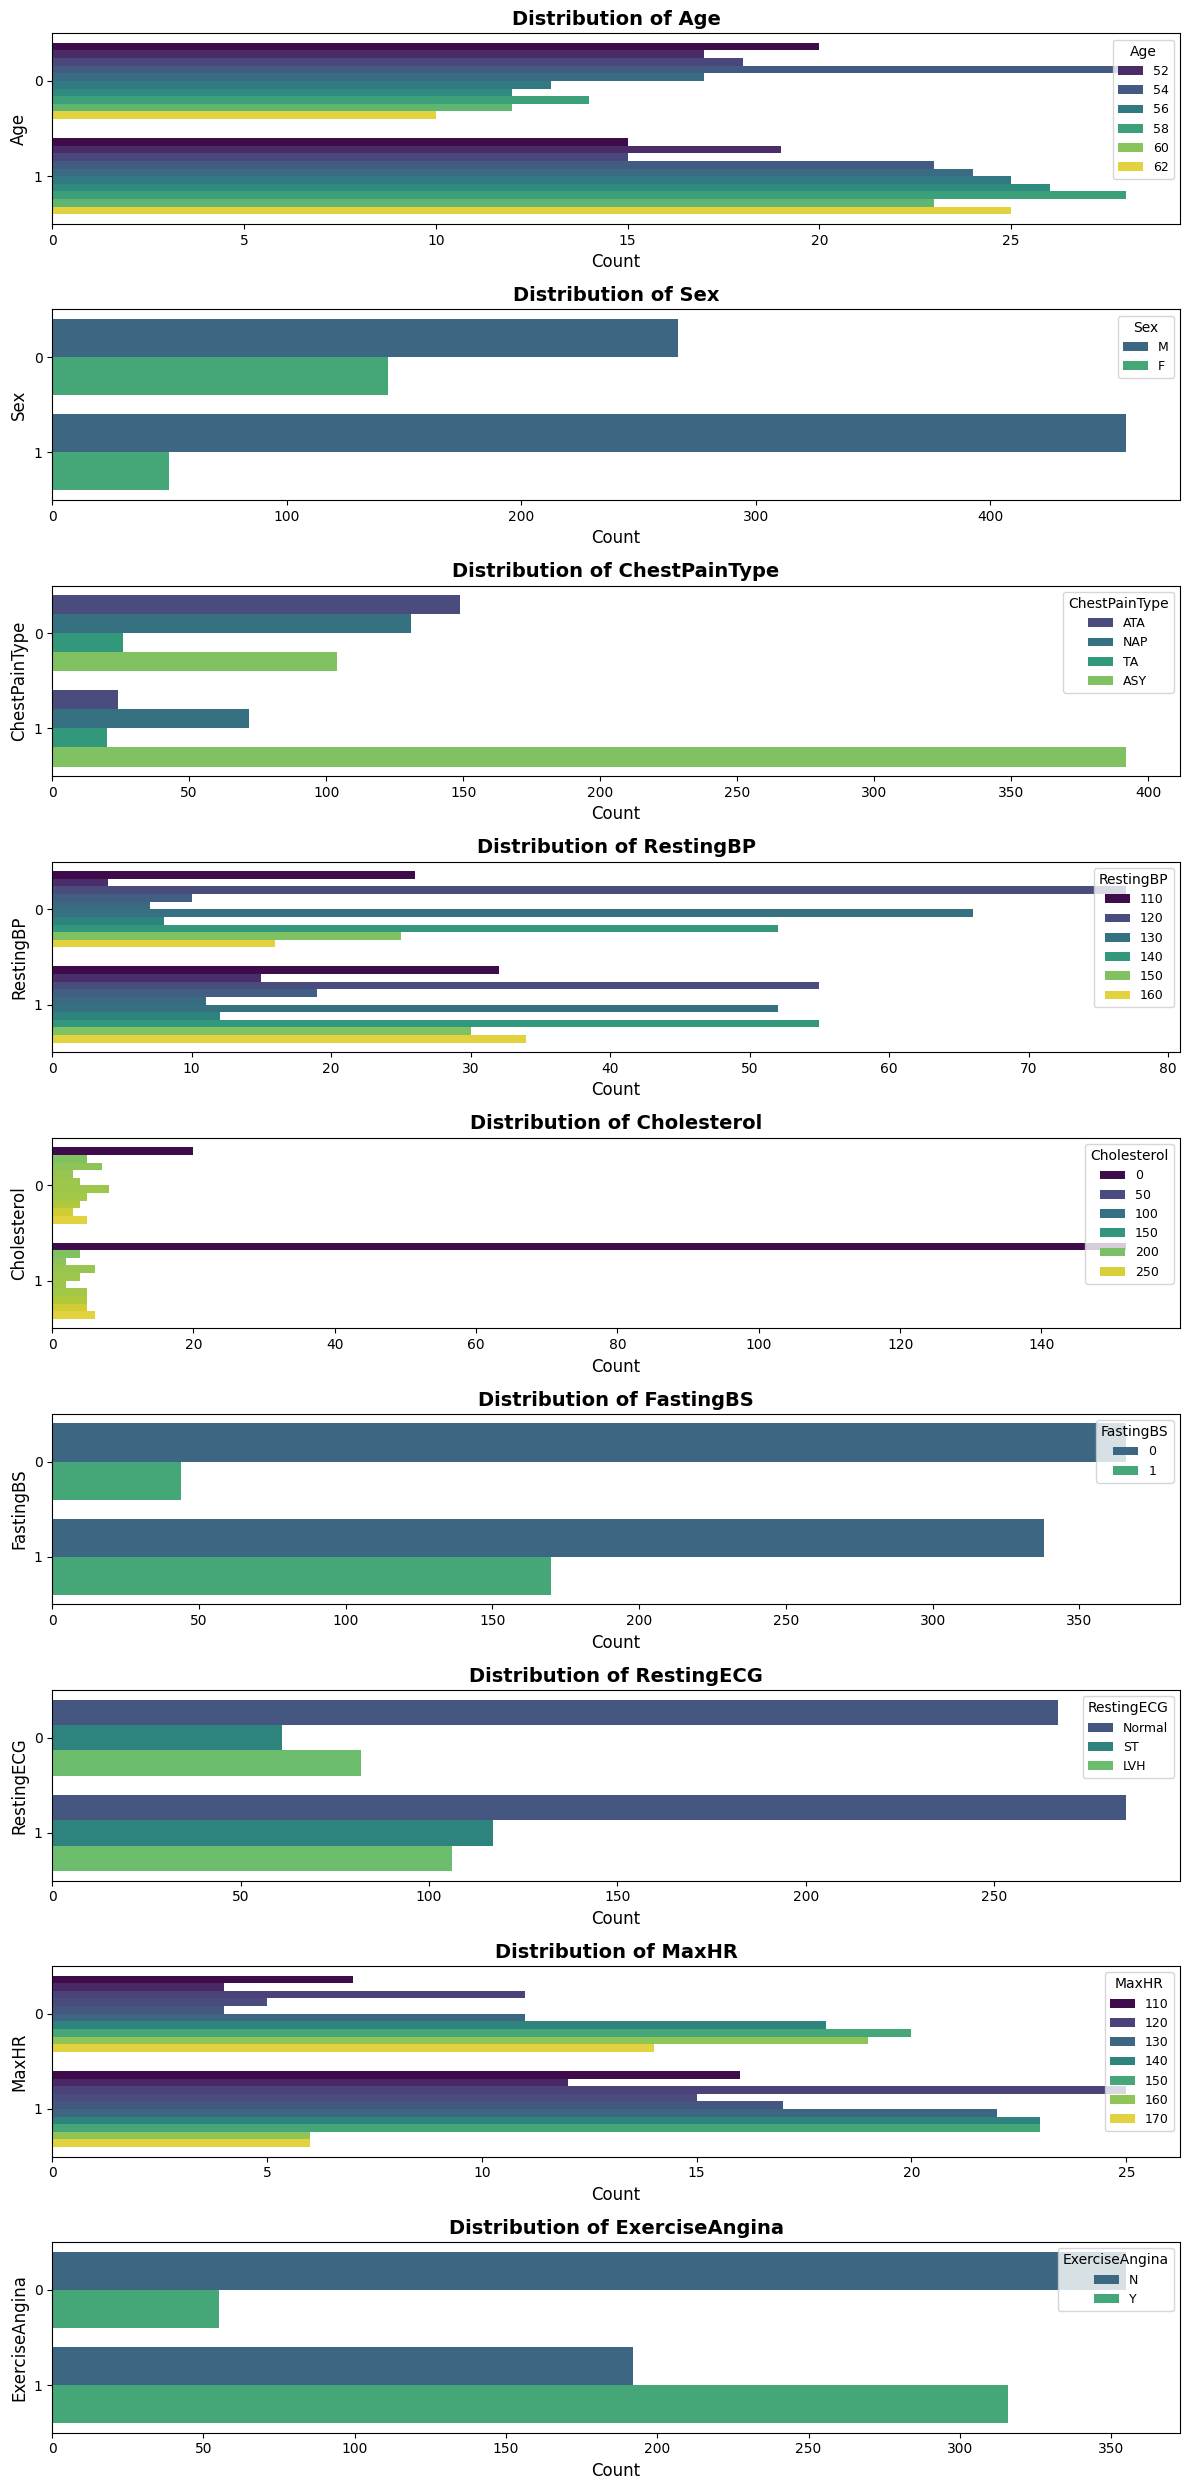

In [15]:
def categorical_plot(features, df, segment_feature=None, max_labels=10):
   fig, ax = plt.subplots(len(features), 1, figsize=(12, 25))
   for i, feature in enumerate(features):
      # Ambil hanya 10 label teratas berdasarkan jumlah kemunculan
      top_labels = df[feature].value_counts().nlargest(max_labels).index
      filtered_df = df[df[feature].isin(top_labels)]
      
      if segment_feature:
         sns.countplot(data=filtered_df, y=segment_feature, hue=feature, ax=ax[i], palette="viridis")
         ax[i].legend(title=feature, loc='upper right', fontsize=9)
      else:
         sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
      
      ax[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
      ax[i].set_xlabel('Count', fontsize=12)
      ax[i].set_ylabel(feature, fontsize=12)
      ax[i].tick_params(axis='both', labelsize=10)
   
   plt.tight_layout()
   plt.show()

categorical_plot(
   features=[
      'Age',
      'Sex',
      'ChestPainType',
      'RestingBP',
      'Cholesterol',
      'FastingBS',
      'RestingECG',
      'MaxHR',
      'ExerciseAngina',
   ],
   segment_feature='HeartDisease',
   df=eda_df,
)



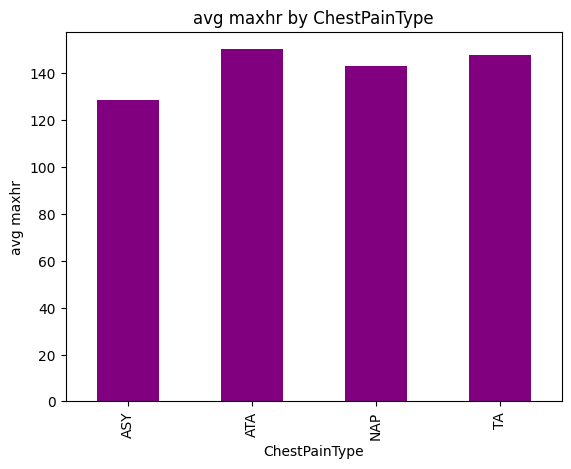

In [17]:
eda_df.groupby('ChestPainType')['MaxHR'].mean().plot(kind='bar', color='purple')
plt.title("avg maxhr by ChestPainType")
plt.ylabel("avg maxhr")
plt.show()

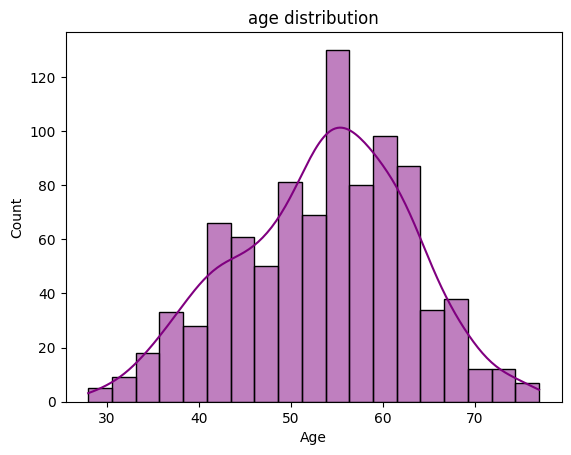

In [18]:
sns.histplot(eda_df['Age'], kde=True , color='purple')
plt.title("age distribution")
plt.show()

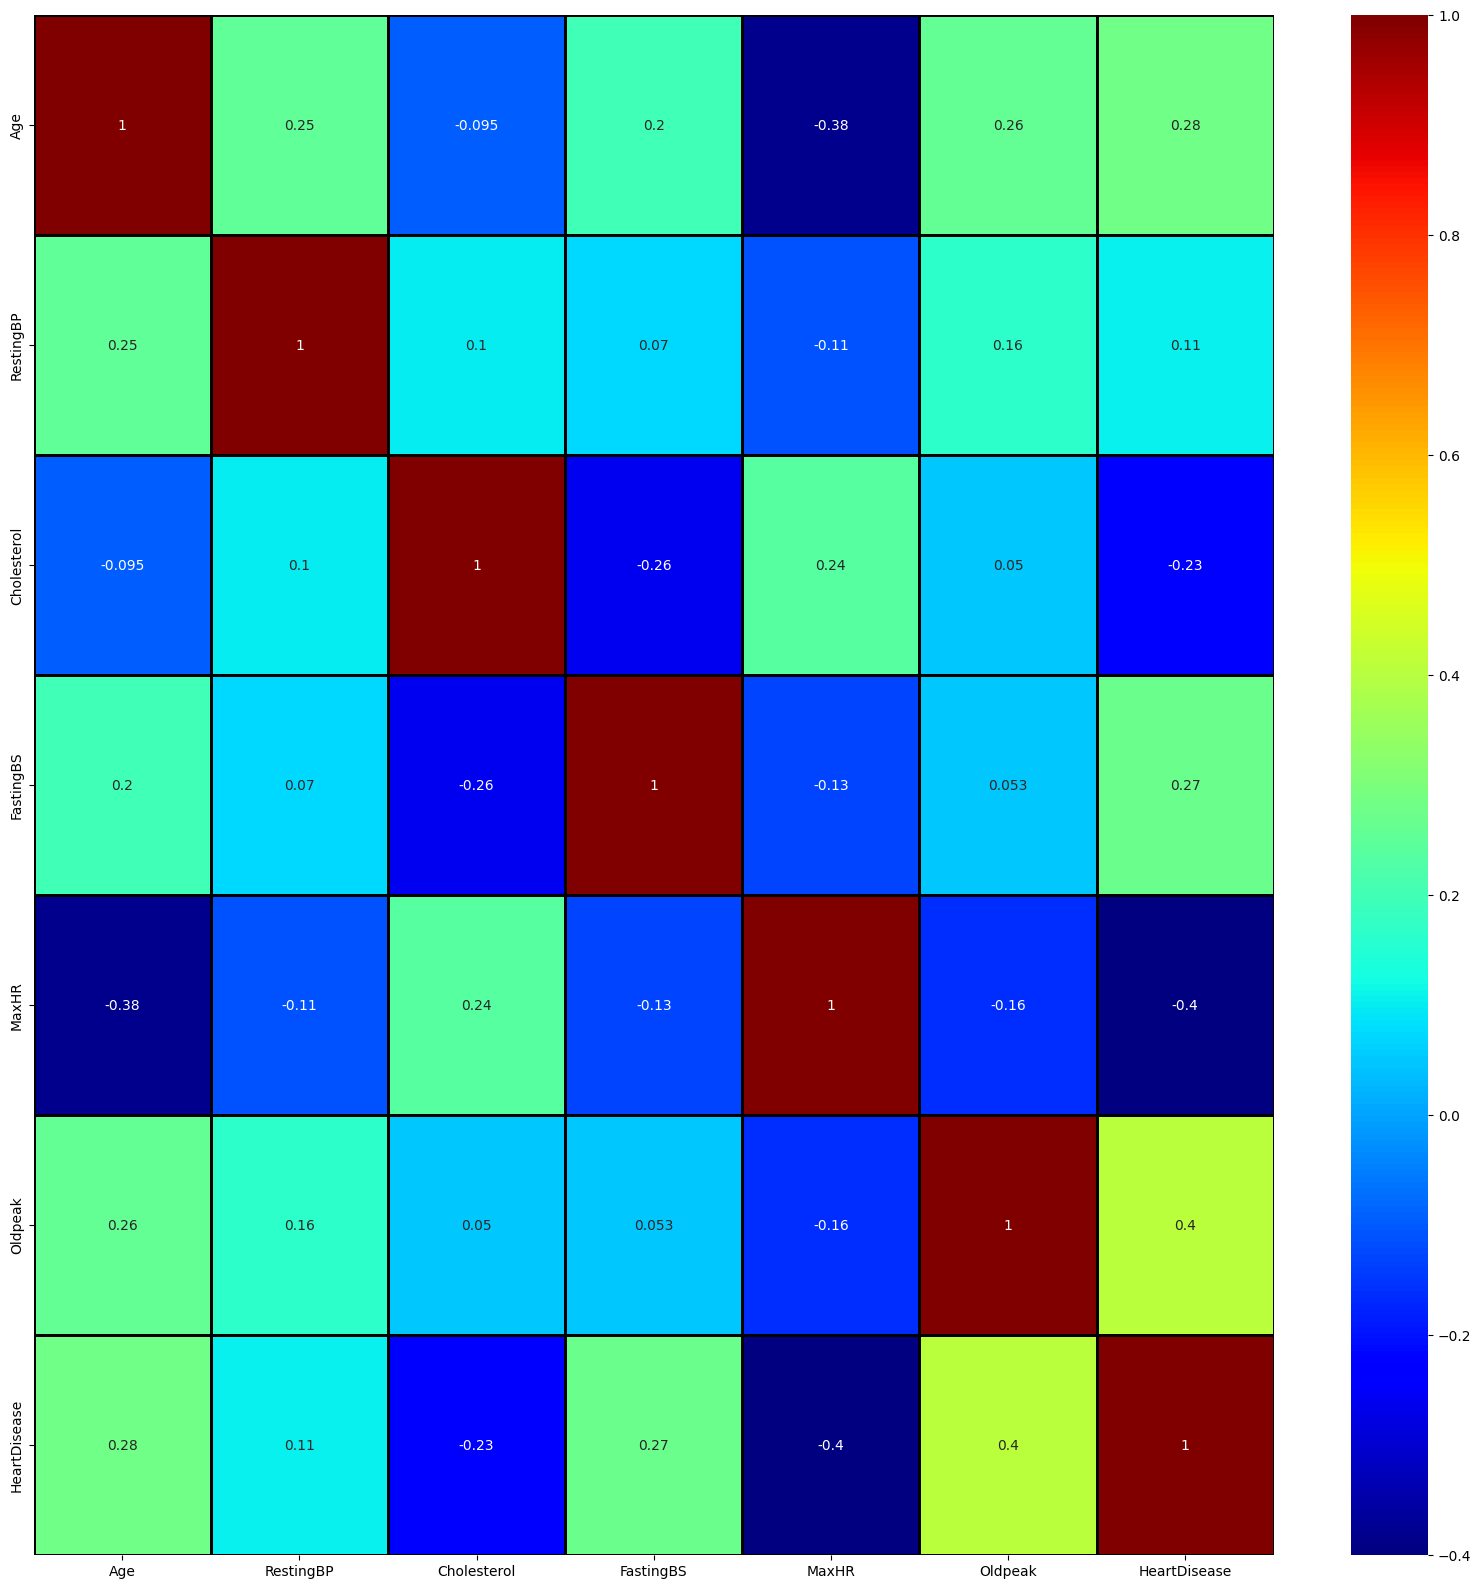

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(eda_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Fix Missing Value

In [20]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Fix Duplicate Value

In [22]:
df.duplicated().sum()

0

### Outlier

In [23]:
# Menggunakan IQR untuk mendeteksi dan menangani outlier pada kolom numerik
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan batas bawah/atas (winsorizing)
for col in numerical_columns:
   df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
   df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

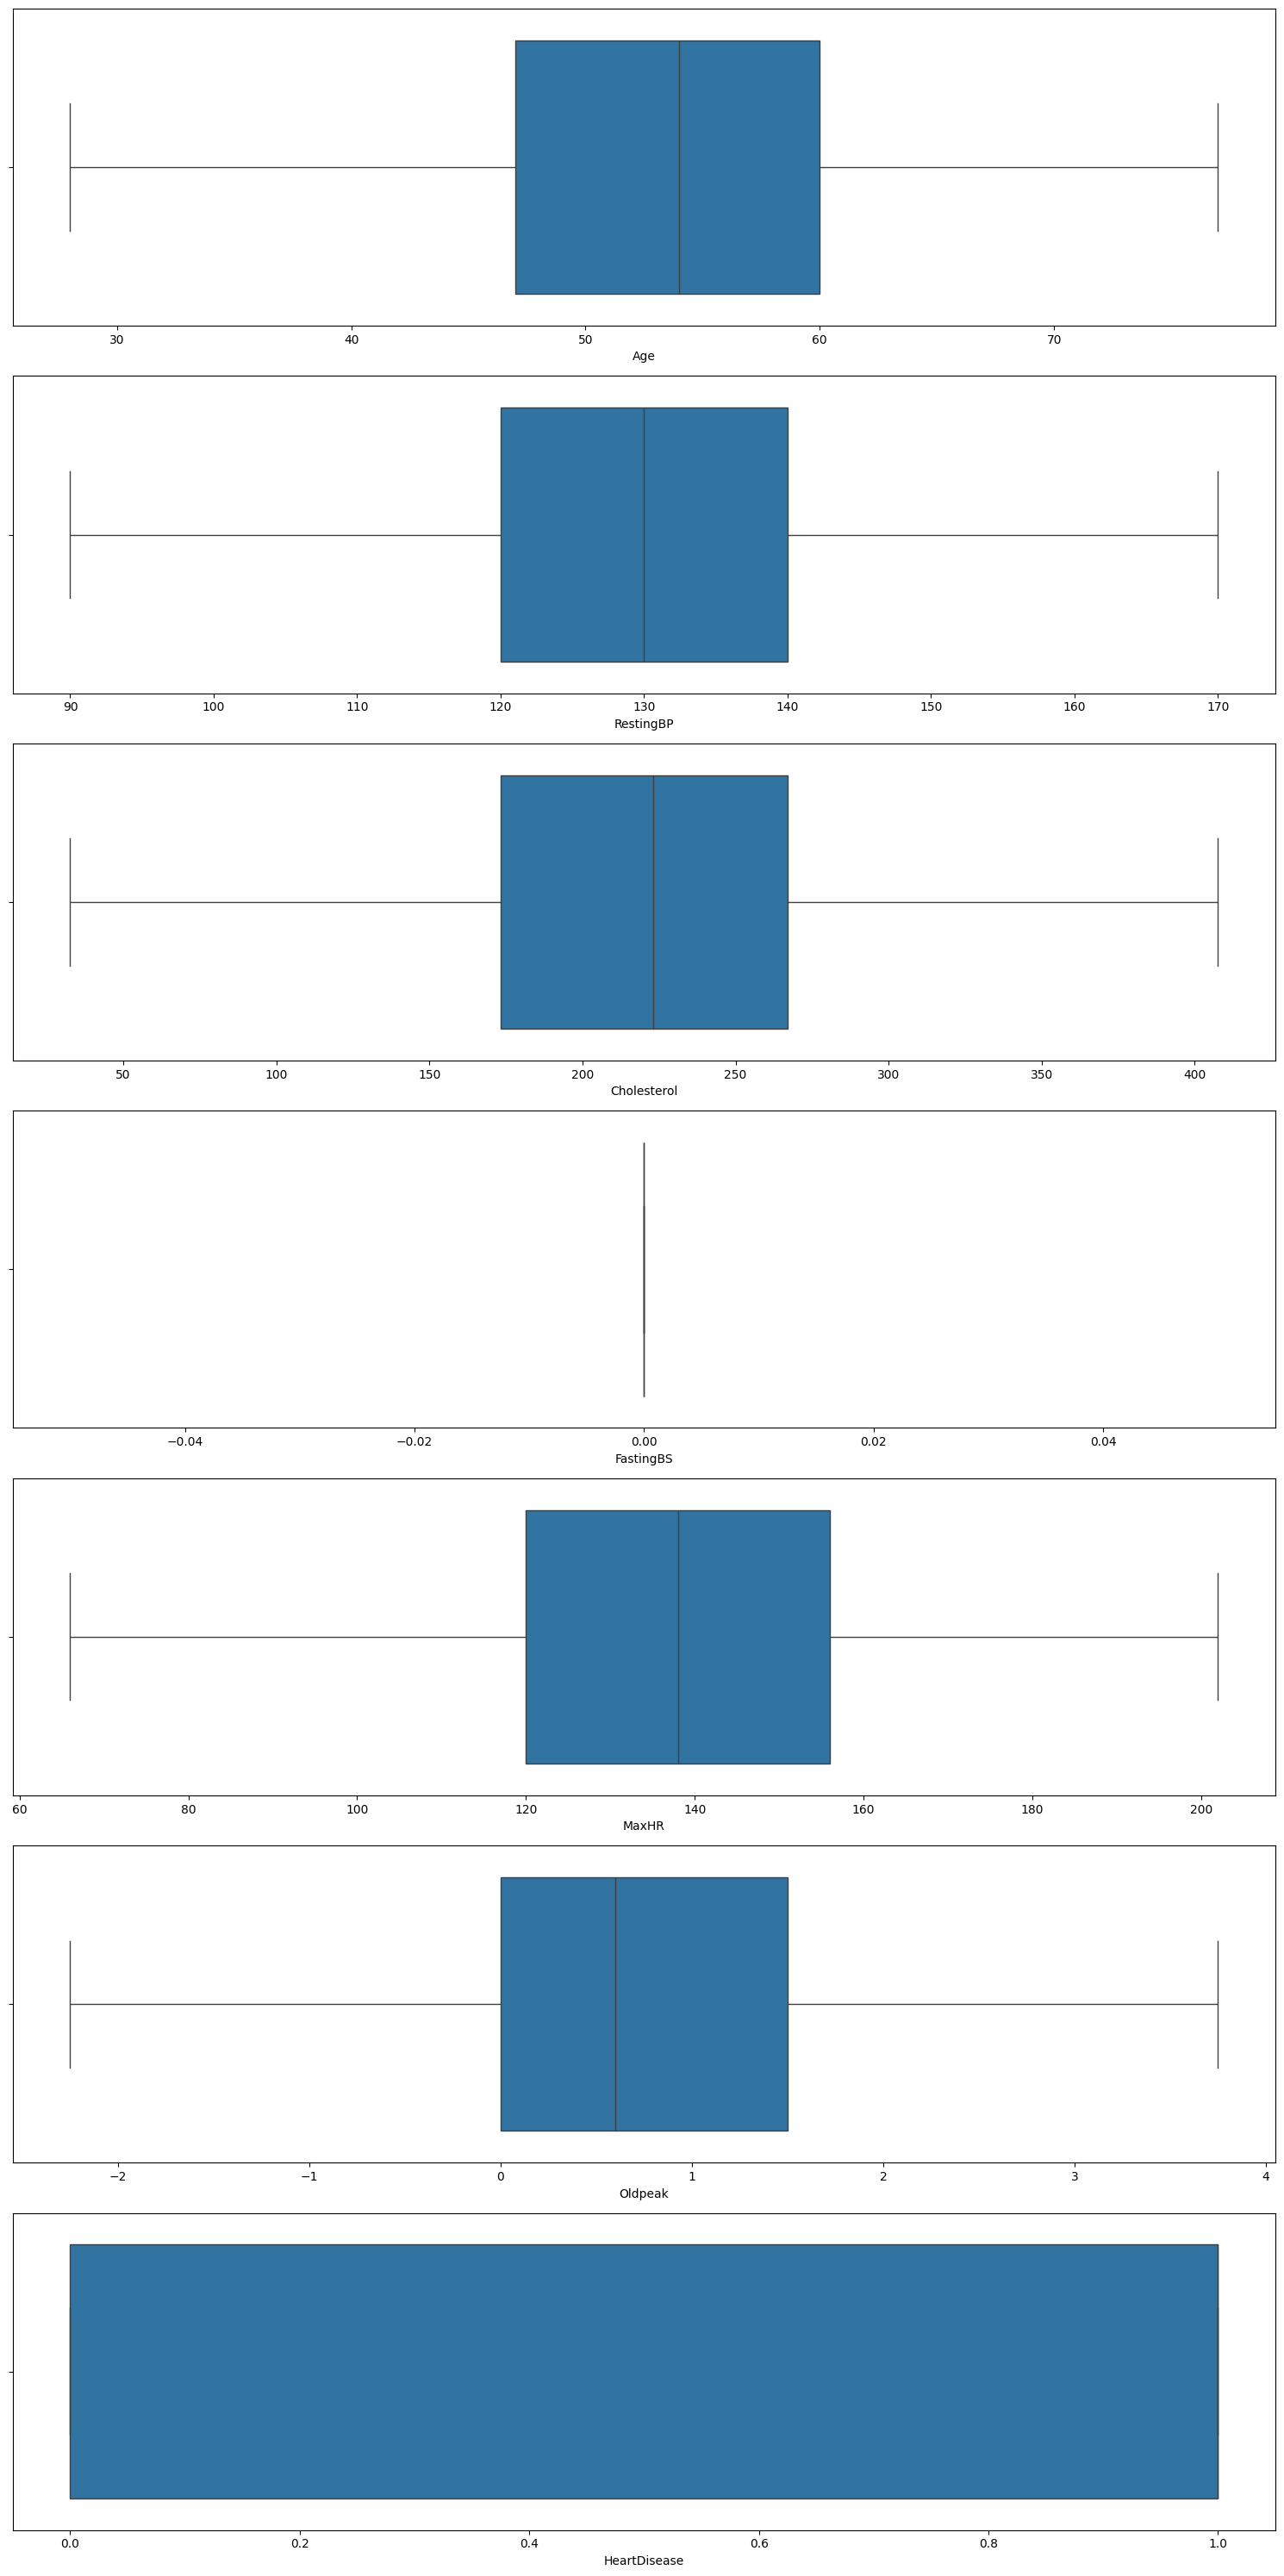

In [24]:
numerical_dis_plot(
   features=numerical_columns,
   df=df,
)

### Normalization

Distribusi fitur numerik pada dataset divisualisasikan menggunakan histogram. Dari hasil visualisasi, terlihat bahwa sebagian besar fitur numerik memiliki distribusi yang tidak simetris (skewed), misalnya pada kolom `study_hours_per_day`, `social_media_hours`, dan `exam_score`. Beberapa fitur menunjukkan adanya outlier yang cukup ekstrem, seperti pada `attendance_percentage` dan `exam_score`. Hal ini menandakan perlunya proses normalisasi atau standarisasi sebelum data digunakan untuk pemodelan machine learning, agar model tidak bias terhadap fitur dengan rentang nilai yang besar atau distribusi yang tidak normal.

In [25]:
from sklearn.preprocessing import StandardScaler

# Membuat salinan dataframe untuk normalisasi
df_scaled = df.copy()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada kolom numerik
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Menampilkan 5 baris pertama hasil standarisasi
df_scaled[numerical_columns].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,-1.433140,0.463654,0.886771,0.0,1.384080,-0.851276,-1.113115
1,-0.478484,1.641229,-0.250184,0.0,0.754610,0.118532,0.898380
2,-1.751359,-0.125133,0.824187,0.0,-1.527219,-0.851276,-1.113115
3,-0.584556,0.345897,0.104463,0.0,-1.133801,0.603436,0.898380
4,0.051881,1.052442,-0.093722,0.0,-0.583014,-0.851276,-1.113115


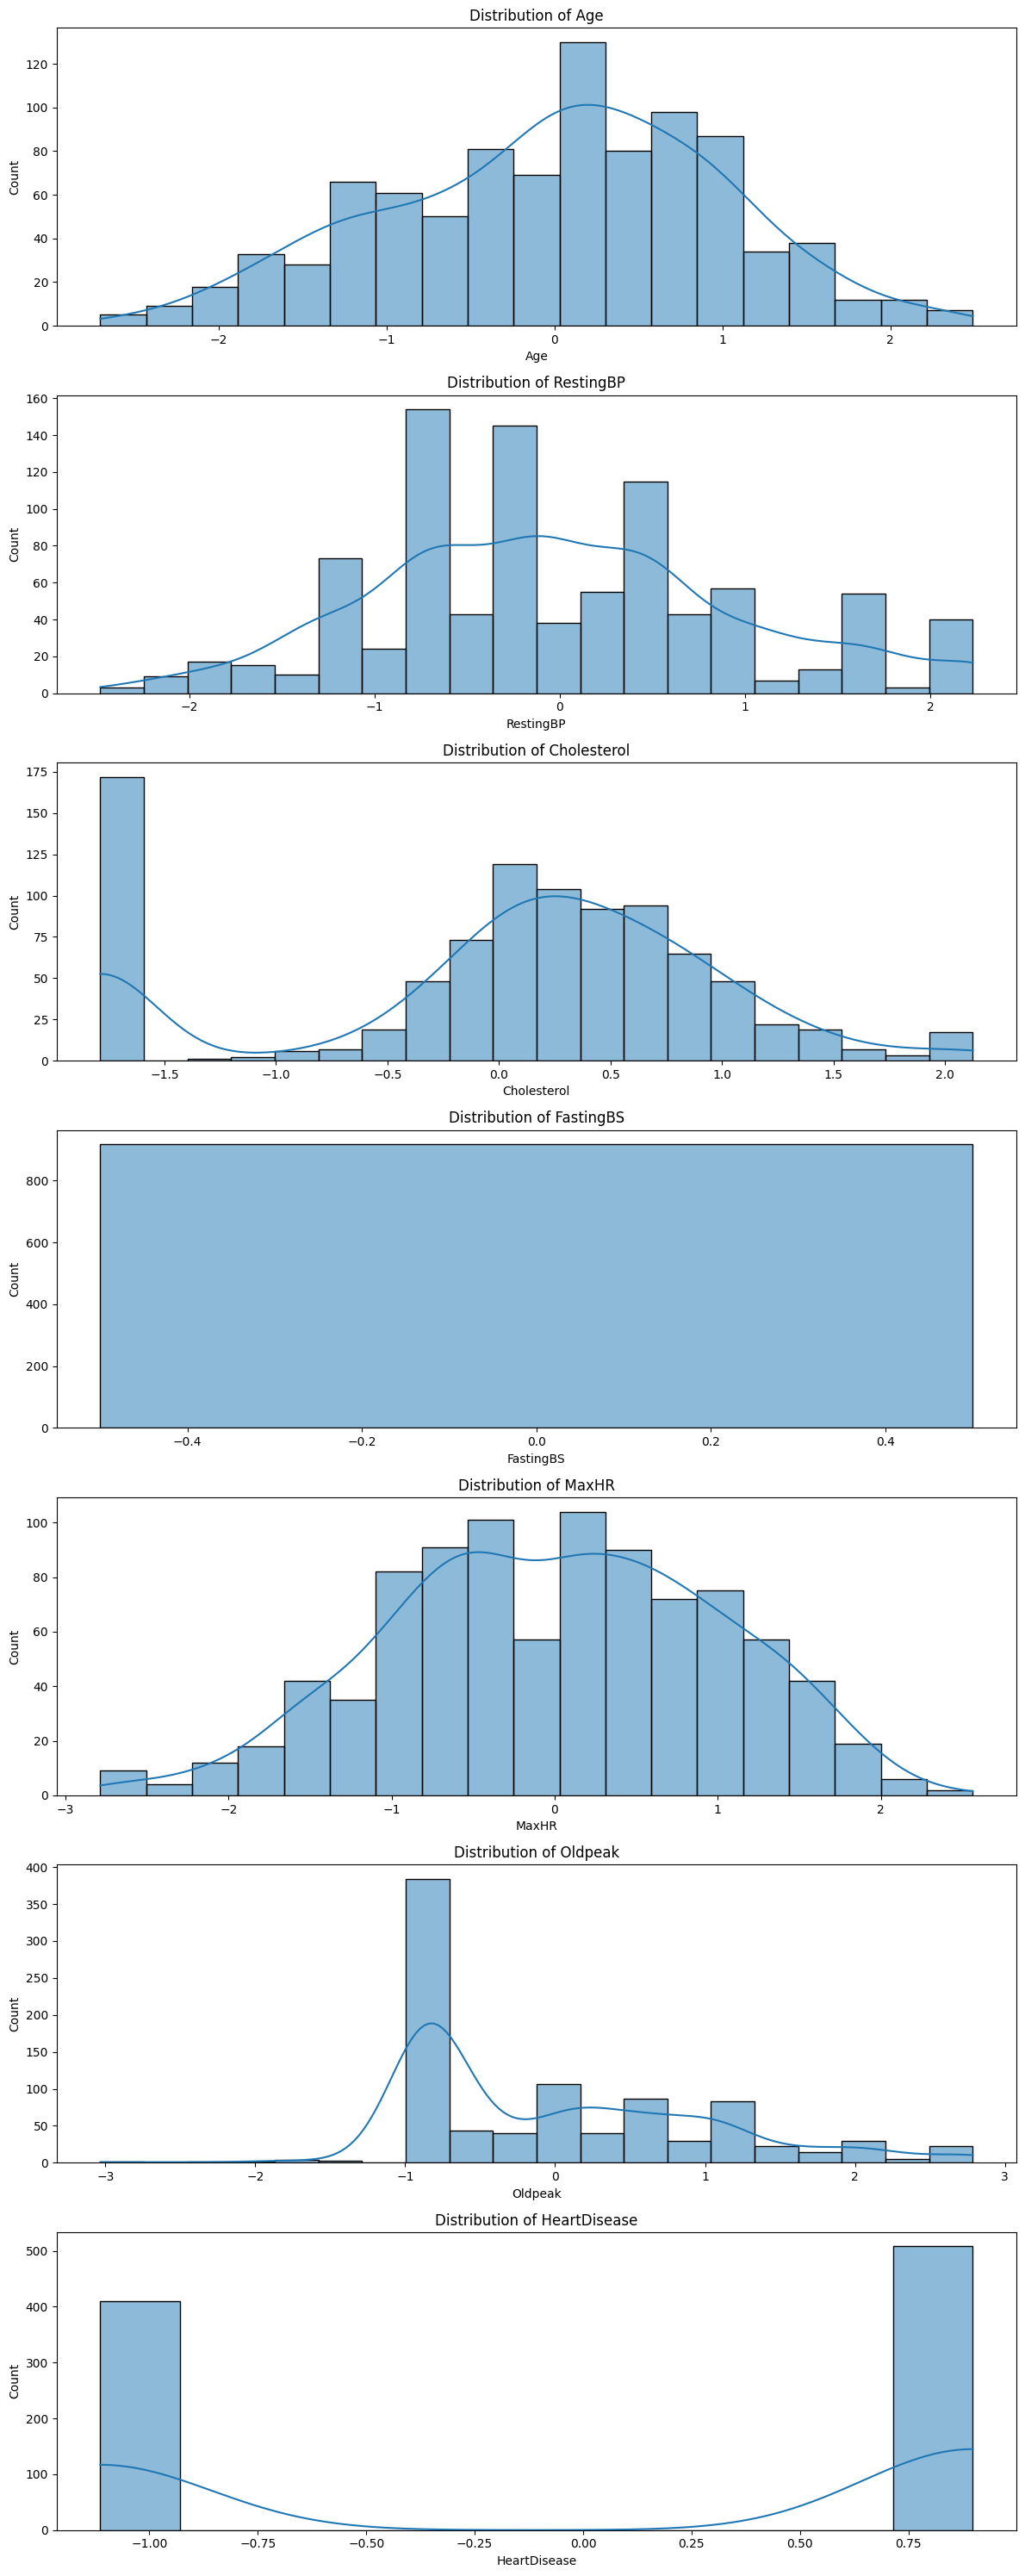

In [26]:
# Visualisasi distribusi setiap fitur numerik
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, 30))
for i, col in enumerate(numerical_columns):
   sns.histplot(df_scaled[col], kde=True, ax=ax[i])
   ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe untuk encoding
df_encoded = df_scaled.copy()

# Melakukan label encoding pada setiap kolom kategorikal
label_encoders = {}
for col in categorical_columns:
   le = LabelEncoder()
   df_encoded[col] = le.fit_transform(df_encoded[col])
   label_encoders[col] = le

df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.463654,0.886771,0.0,1,1.384080,0,-0.851276,2,-1.113115
1,-0.478484,0,2,1.641229,-0.250184,0.0,1,0.754610,0,0.118532,1,0.898380
2,-1.751359,1,1,-0.125133,0.824187,0.0,2,-1.527219,0,-0.851276,2,-1.113115
3,-0.584556,0,0,0.345897,0.104463,0.0,1,-1.133801,1,0.603436,1,0.898380
4,0.051881,1,2,1.052442,-0.093722,0.0,1,-0.583014,0,-0.851276,2,-1.113115


In [29]:
# Simpan hasil preprocessing ke folder preprocessing/dataset
os.makedirs('../preprocessing/dataset', exist_ok=True)
df_encoded.to_csv('../preprocessing/dataset/failure_heart_preprocessing.csv', index=False)